#Приготовления с файлом

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import math


# отключаем предупреждения
warnings.filterwarnings('ignore')

# Import

In [ ]:
#@markdown **Импортирую файл**
data = pd.read_csv('/content/cars_info.csv') # Прочитаем csv-файл
data.tail() # Выведем его первые пять строк.

,ad_id,title,price,Year,Generation,Mileage,PTS,Condition,Modification,Engine_capacity,Type_engine,Transmission,Body_type,color,seller_type,address,current_url
512,№ 3450776471,Datsun on-DO 1.6 MT,527000,2014,I (2014—2019),121000,2,Не битый,1.6 MT (87 л.с.),1.6 л,Бензин,Механика,Седан,Бордовый,Автодилер,"Московская область, г.о. Мытищи, пос. Нагорное...",https://www.avito.ru/moskva/avtomobili/datsun_...
513,№ 2937704797,Renault Latitude 2.0 CVT,770000,2013,I (2010—2013),237000,3,Не битый,2.0 CVT (139 л.с.),2 л,Бензин,Вариатор,Седан,Чёрный,Частное лицо,"Республика Карелия, Петрозаводский г.о., Петро...",https://www.avito.ru/petrozavodsk/avtomobili/r...
514,№ 3356494422,Opel Astra 1.6 MT,980000,2013,J рестайлинг (2012—2018),176000,2,Не битый,1.6 MT (115 л.с.),1.6 л,Бензин,Механика,Хетчбек 5-дверный,Чёрный,Частное лицо,"Калужская область, Обнинск",https://www.avito.ru/obninsk/avtomobili/opel_a...
515,№ 3532422048,Chevrolet Cruze 1.6 AT,850000,2013,I рестайлинг (2012—2015),161000,2,Не битый,1.6 AT (109 л.с.),1.6 л,Бензин,Автомат,Хетчбек 5-дверный,Белый,Частное лицо,"Санкт-Петербург, Дальневосточный пр-т, 69к5",https://www.avito.ru/sankt-peterburg/avtomobil...
516,№ 3297239619,Mazda 3 1.6 AT,875000,2011,BL (2008—2011),186500,6,Не битый,1.6 AT (105 л.с.),1.6 л,Бензин,Автомат,Седан,Белый,Частное лицо,"Калужская область, Боровский р-н, городское по...",https://www.avito.ru/balabanovo/avtomobili/maz...


In [ ]:
#отображения чисел с плавающей запятой в pandas
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Используем регулярные выражения для разделения столбца
data['Power'] = data['Modification'].str.extract(r'\((\d+)')
data.drop('Modification', axis=1, inplace=True)
data['Engine_capacity']=data['Engine_capacity'].str.replace(' л','')
data['Engine_capacity'] = data['Engine_capacity'].astype(float)
data['Power'] = data['Power'].astype(int)

In [ ]:
#@markdown **Количество строк и столбцов**
data.shape

(517, 17)

In [ ]:
#@markdown **Описательные статистики**
data.describe()

,price,Year,Mileage,Engine_capacity,Power
count,517.00,517.00,517.00,517.00,517.00
mean,860734.24,2013.71,146866.38,1.57,115.09
std,149290.34,2.34,40286.80,0.15,16.68
min,450000.00,2011.00,10.00,1.20,70.00
25%,750000.00,2012.00,120000.00,1.60,105.00
50%,860000.00,2013.00,152775.00,1.60,110.00
75%,980000.00,2015.00,179861.00,1.60,123.00
max,1100000.00,2022.00,286000.00,2.30,200.00


In [ ]:
#@markdown **Типы данных**
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_id            517 non-null    object 
 1   title            517 non-null    object 
 2   price            517 non-null    int64  
 3   Year             517 non-null    int64  
 4   Generation       517 non-null    object 
 5   Mileage          517 non-null    int64  
 6   PTS              517 non-null    object 
 7   Condition        517 non-null    object 
 8   Engine_capacity  517 non-null    float64
 9   Type_engine      517 non-null    object 
 10  Transmission     517 non-null    object 
 11  Body_type        517 non-null    object 
 12  color            517 non-null    object 
 13  seller_type      517 non-null    object 
 14  address          517 non-null    object 
 15  current_url      517 non-null    object 
 16  Power            517 non-null    int64  
dtypes: float64(1), i

In [ ]:
#@markdown **Ищу пропущенные значения**
data.isnull().sum()

ad_id              0
title              0
price              0
Year               0
Generation         0
Mileage            0
PTS                0
Condition          0
Engine_capacity    0
Type_engine        0
Transmission       0
Body_type          0
color              0
seller_type        0
address            0
current_url        0
Power              0
dtype: int64

In [ ]:
#@markdown **Поиск дубликатов**
data.duplicated().sum()

0

In [ ]:
#@markdown **Узнаем 75% самых старых автомиблей**
_old_cars = data.loc[data['Year'] <= data['Year'].quantile(0.25)]['title'].count()
year_75 = data['Year'].quantile(0.25)
print(f"{_old_cars} Автомобилей c годом {year_75}")

192 Автомобилей c годом 2012.0


In [ ]:
#@markdown **Узнаем средний год выпуска автомиблей**
_median_cars = data.loc[data['Year'] == data['Year'].median()]['title'].count()
year_median = data['Year'].median()
print(f"{_median_cars} Автомобилей c годом {year_median}")

91 Автомобилей c годом 2013.0


In [ ]:
#@markdown **Узнаем сколько самых молодых автомобилей**
_young_cars = data.loc[data['Year'] >= data['Year'].quantile(0.75)]['title'].count()
year_young = data['Year'].quantile(0.85)
print(f"{_young_cars} Автомобилей c годом от {year_young}")

157 Автомобилей c годом от 2016.0


#Изменяю типы данных


In [ ]:
data['PTS'] =  data['PTS'].str.replace('+','')
data['PTS'] = data['PTS'].astype('int')

In [ ]:
models = [
    'ford focus',
    'kia rio',
    'Volkswagen Polo',
    'Hyundai Solaris',
    'Peugeot 308',
    'Peugeot 408',
    'Skoda Rapid',
    'Kia Ceed',
    'Skoda Octavia',
    'Ford Mondeo',
    'Kia Cerato',
    'Volkswagen Jetta',
    'Volkswagen Passat',
    'Hyundai i30',
    'Peugeot 3008',
    'Toyota Avensis',
    'Peugeot 107',
    'Peugeot 4007',
    'Peugeot 508',
    'Peugeot 301',
    'Renault Logan',
    'Hyundai Elantra',
    'Renault Sandero',
    'Renault Duster',
    'Skoda Fabia',
    'Renault Symbol',
    'Renault Megane',
    'Peugeot 208',
    'Peugeot 2008',
    'Peugeot 4008',
    'Hyundai Accent'
]

def find_model(title):
    for model in models:
        if model.lower() in title.lower():
            return model
    return ''

data['model'] = data['title'].apply(find_model)


In [ ]:
data['model'].unique()

array(['Hyundai Solaris', 'Skoda Rapid', 'Kia Ceed', 'kia rio',
       'Hyundai i30', 'ford focus', 'Ford Mondeo', 'Skoda Fabia',
       'Skoda Octavia', 'Peugeot 308', 'vw polo', 'Volkswagen Jetta',
       'Kia Cerato', 'Volkswagen Passat', 'Peugeot 3008',
       'Hyundai Accent', 'Hyundai Elantra', ''], dtype=object)

#Фильтрую данные, чтобы остались только частные объявления

In [ ]:
diler = ['Автодилер']
owner = ['Частное лицо']

In [ ]:
data = data.loc[~data.seller_type.isin(diler)]
data = data.loc[data.seller_type.isin(owner)]

#Графики


In [ ]:
# Средняя цена автомобилей по годам выпуска
avg_price_per_year = data.groupby('Year')['price'].mean()

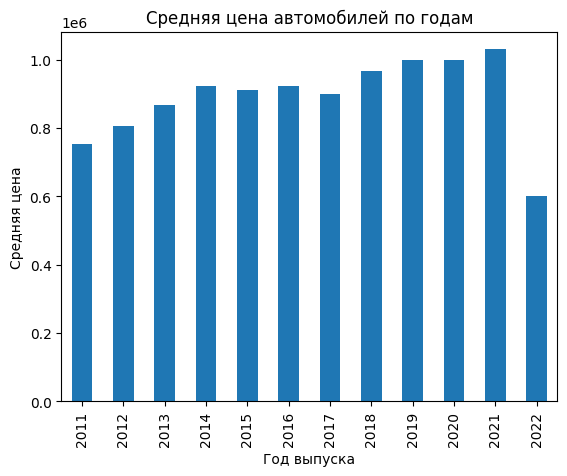

In [ ]:
# График средней цены автомобилей по годам выпуска
avg_price_per_year.plot(kind='bar')
plt.title("Средняя цена автомобилей по годам")
plt.ylabel("Средняя цена")
plt.xlabel("Год выпуска")
plt.show()

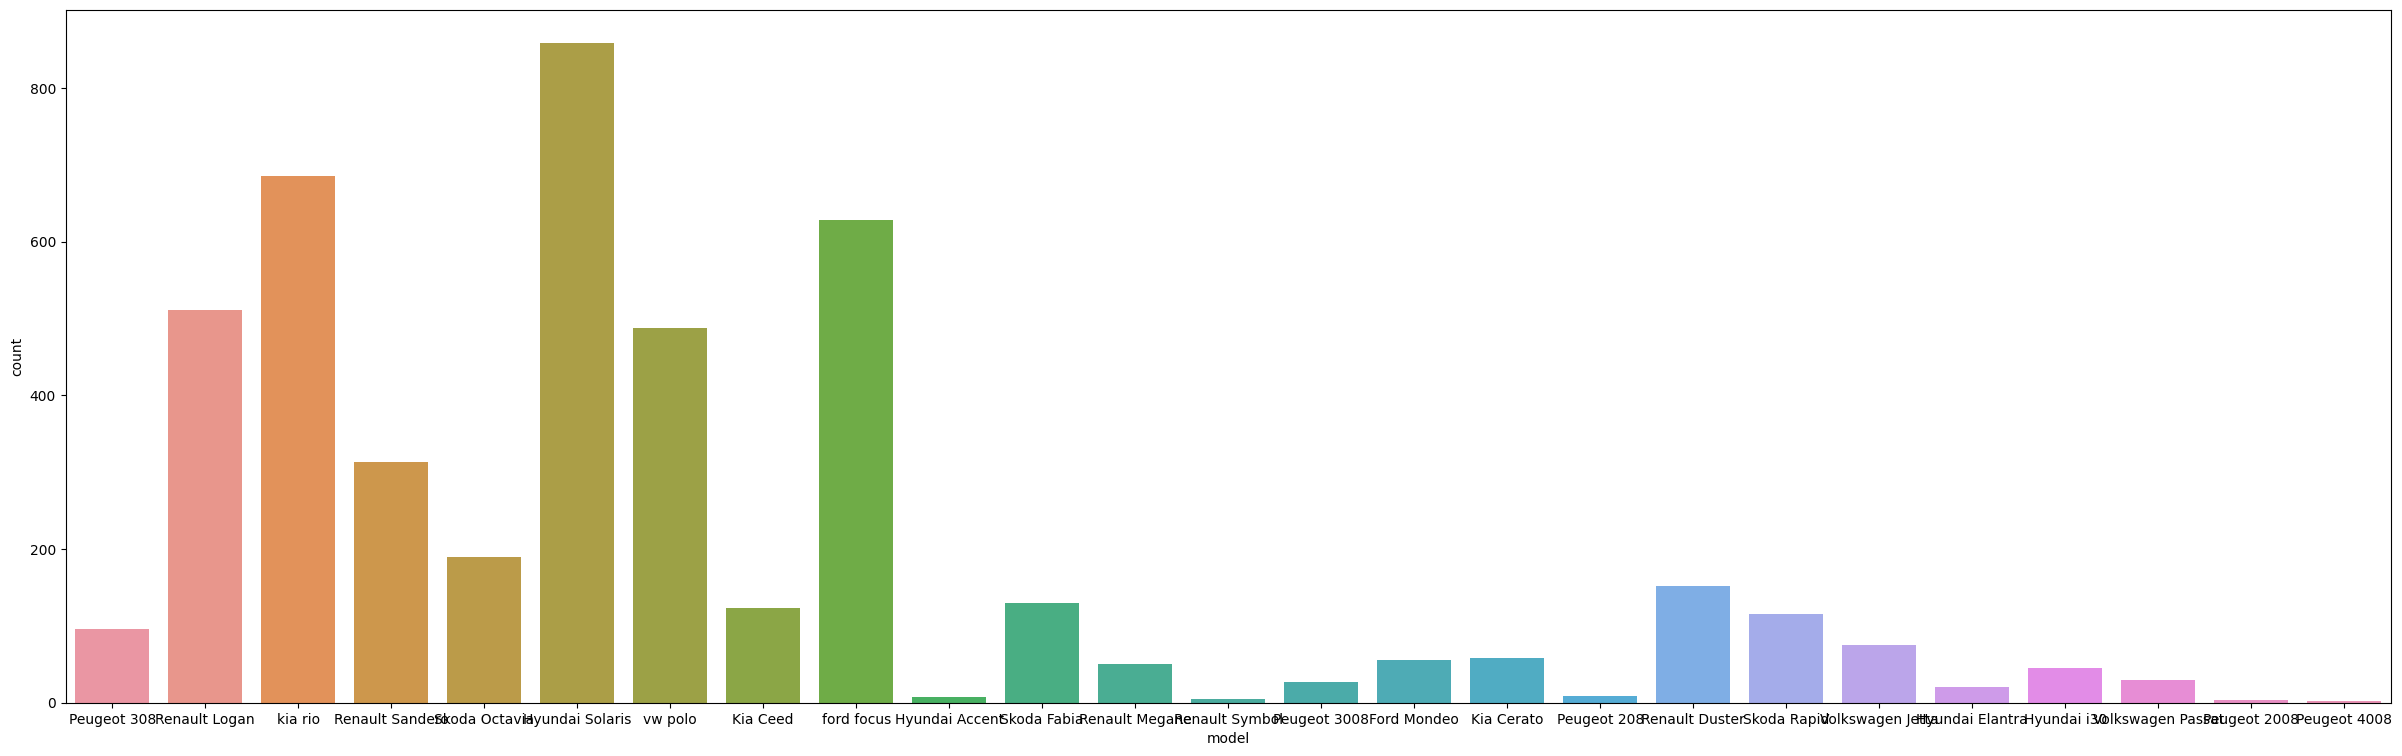

In [ ]:
plt.figure(figsize=(30,9))
sns.countplot(data=sorted_cars, x='model')
plt.show()

In [ ]:
message = f"""
Всего собрано объявлений: *{data.shape[0]}*
Средняя цена у автомобилей: *{round(data['price'].mean())} Руб.*
Большинство авто: *{_median_cars}* c годом до: *{round(year_median)}*
Средний пробег *{round(data['Mileage'].mean())} км*
"""

my_bot.sendMessage('-4030974191', message, parse_mode='Markdown')

{'message_id': 2055,
 'from': {'id': 2138397598,
  'is_bot': True,
  'first_name': 'Avi',
  'username': 'AvinotoBot'},
 'chat': {'id': -4030974191,
  'title': 'Выбираем автомобиль',
  'type': 'group',
  'all_members_are_administrators': True},
 'date': 1695135777,
 'text': 'Всего собрано объявлений: 2328\nСредняя цена у автомобилей: 802201 Руб.\nБольшинство авто: 422 c годом до: 2013\nСредний пробег 145243 км',
 'entities': [{'offset': 26, 'length': 4, 'type': 'bold'},
  {'offset': 59, 'length': 11, 'type': 'bold'},
  {'offset': 89, 'length': 3, 'type': 'bold'},
  {'offset': 105, 'length': 4, 'type': 'bold'},
  {'offset': 125, 'length': 9, 'type': 'bold'}]}

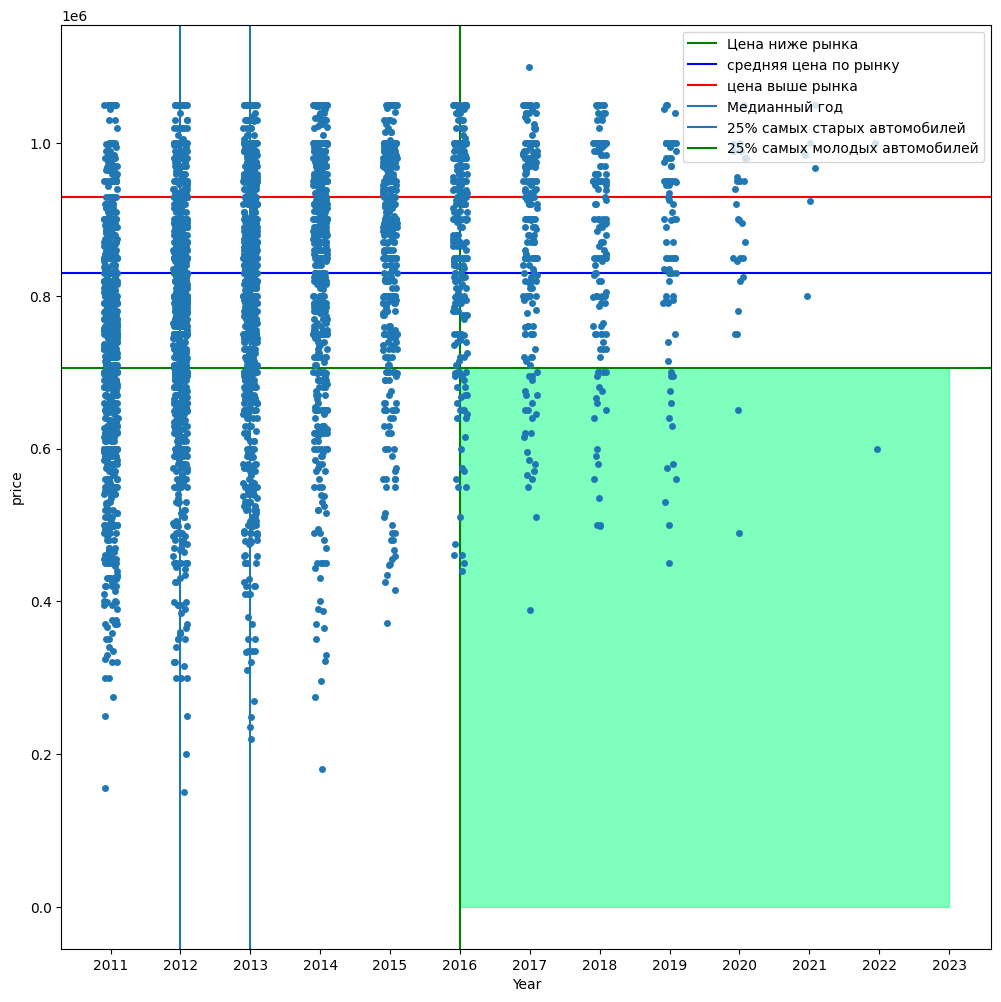

In [ ]:
#@markdown **Посмотрим на графике распределение автомобилей по годам и цене**

#@markdown ***Точки это автомобили***

#@markdown ***Зеленая горизонтальная полоса - цена на автомобили ниже рынка***

#@markdown ***Выделенная область автомобили которые нас интересуют***


plt.figure(figsize=(12, 12))
sns.stripplot(data=sorted_cars, x="Year", y="price")
# for i in range(len(filter_data['Year'])):
#     plt.text(filter_data['Year'][i], filter_data['price'][i], filter_data['title'][i])
plt.axhline(y=sorted_cars['price'].quantile(0.25), color='green', label='Цена ниже рынка')
plt.axhline(y=sorted_cars['price'].quantile(0.5), color='blue', label='средняя цена по рынку')
plt.axhline(y=sorted_cars['price'].quantile(0.75),color='red', label='цена выше рынка')
plt.axvline(x='2013', label='Медианный год')
# plt.axvspan('2016', '2022', color='#EF9A9A', alpha=0.5)
plt.axvline(x='2012', label='25% самых старых автомобилей' )
plt.axvline(x='2016',label='25% самых молодых автомобилей', color='green')
plt.legend(loc="upper right")

x_values = ['2016', '2023']
y1_values = [sorted_cars['price'].min()] * len(x_values)
y2_values = [sorted_cars['price'].quantile(0.25)] * len(x_values)

plt.fill_between(x_values,  y2_values, color='#00FF7F', alpha=0.5)


plt.show()
# plt.savefig(buf, format='png')
# buf.seek(0)
# my_bot.sendPhoto('-4030974191', photo=buf, caption=f"Посмотрим на графике распределение автомобилей по годам и цене\nТочки это автомобили\nЗеленая горизонтальная полоса - цена на автомобили ниже рынка\nВыделенная область автомобили которые нас интересуют")

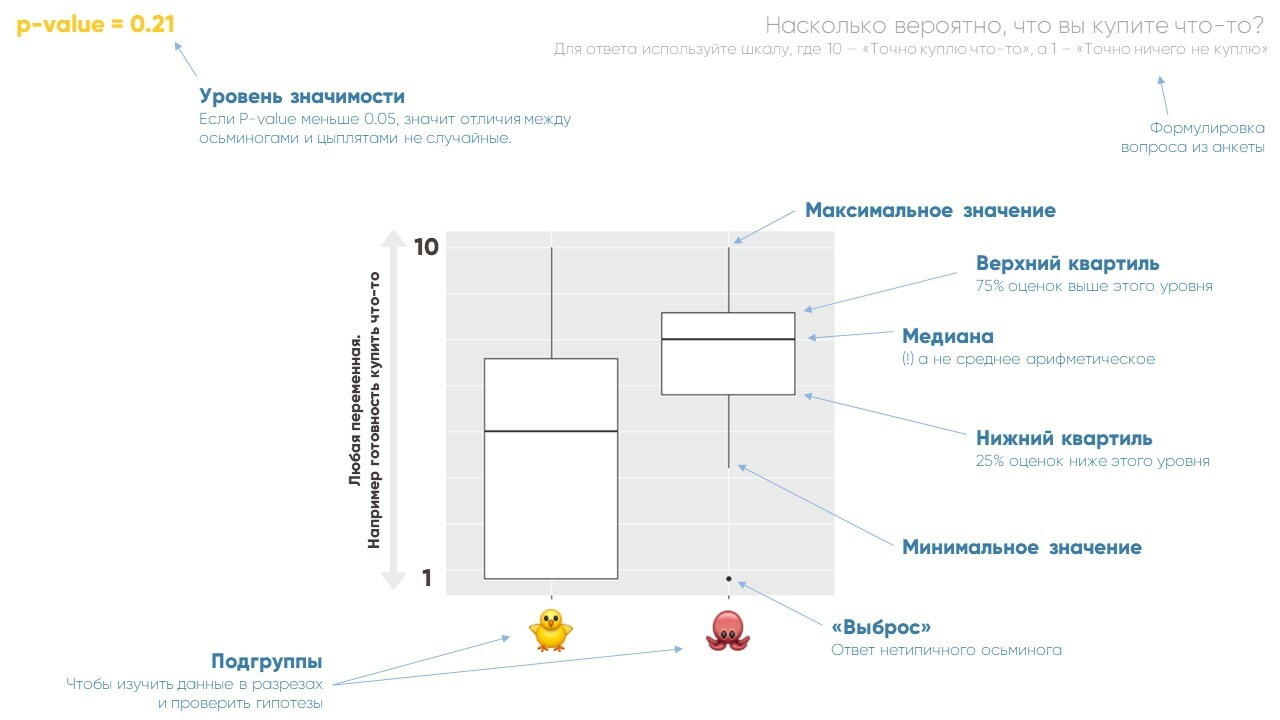

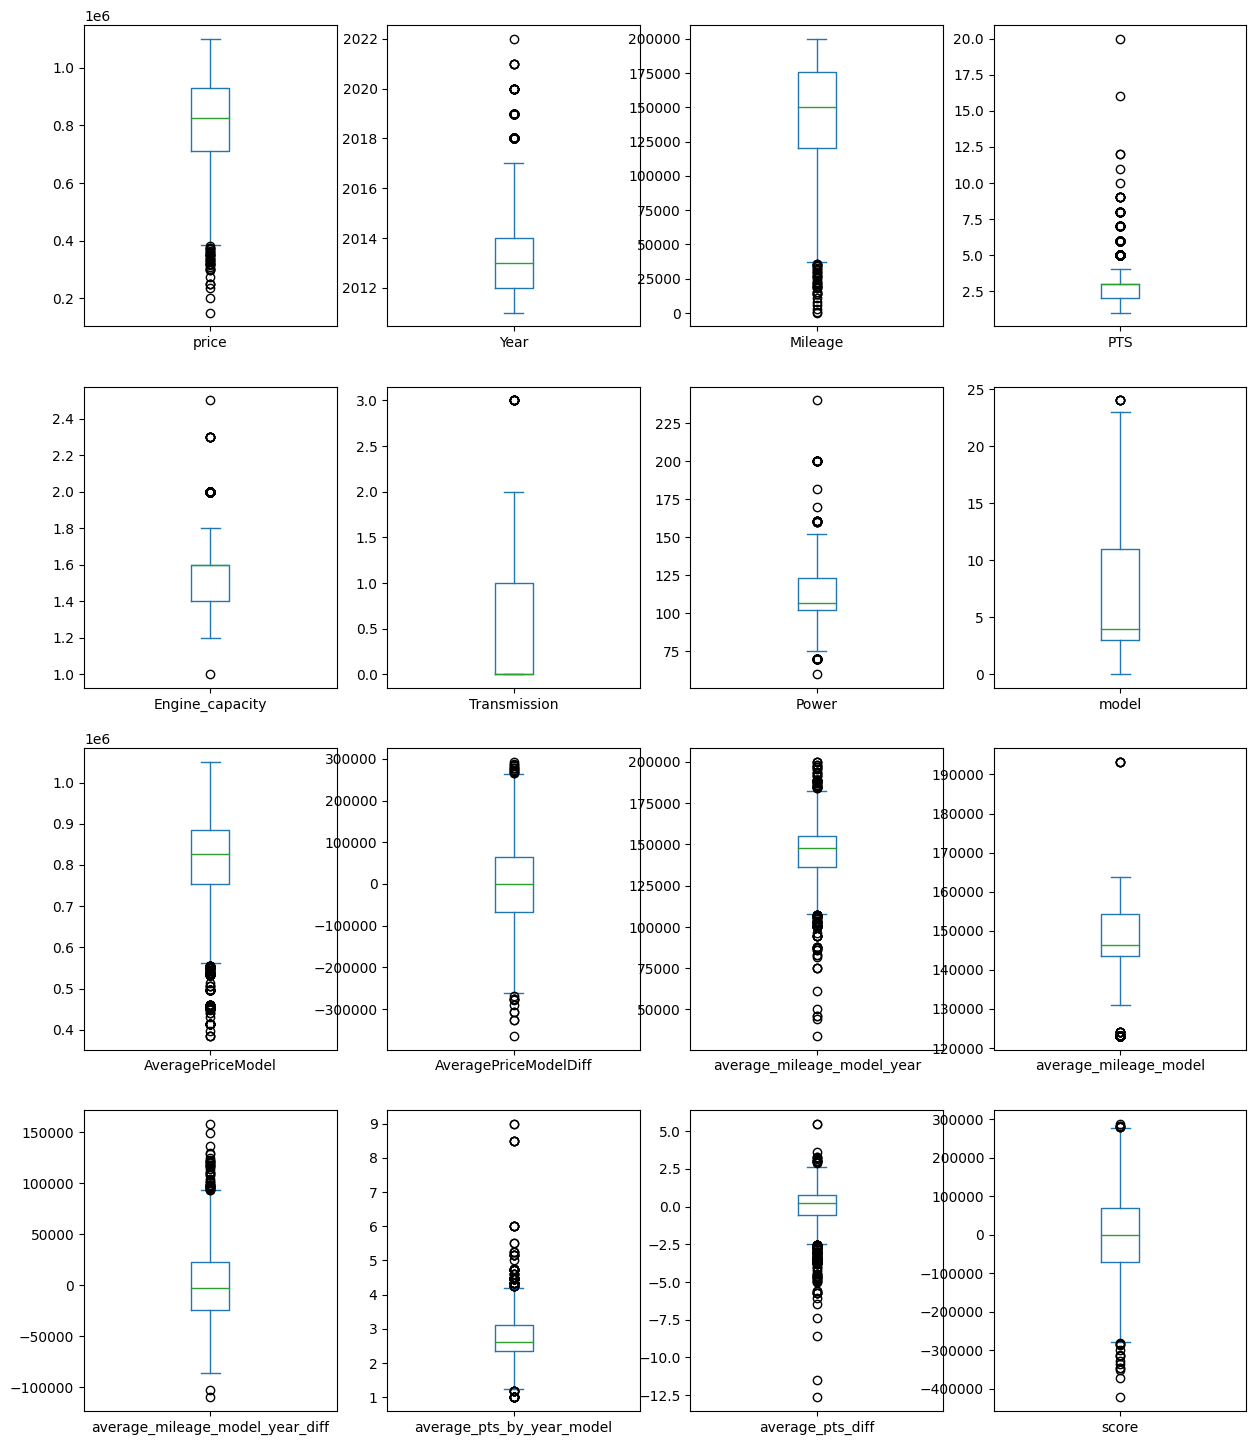

In [ ]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,18))

plt.show()

In [ ]:
#Есть выбросы их надо удалить
for column in ['price', 'Year','Mileage','Power', 'PTS']:

    # если столбец числовой
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  # Границы выбросов
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Отфильтровать выбросы
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

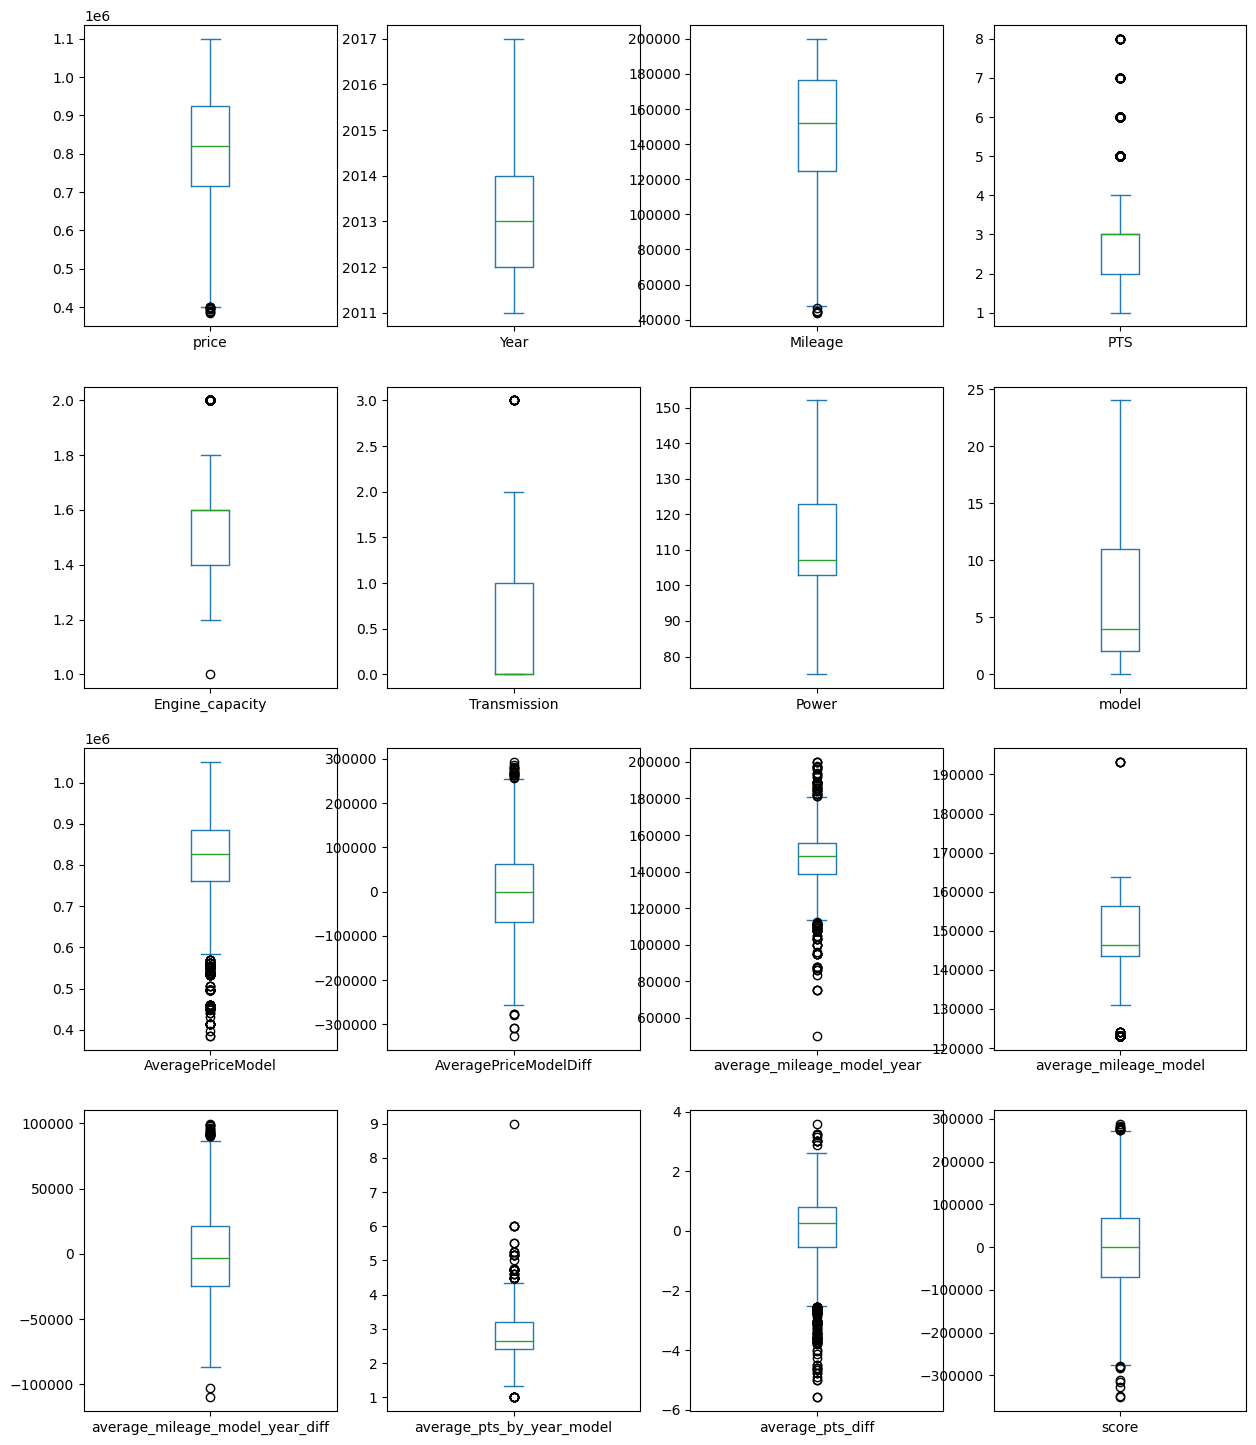

In [ ]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,18))

plt.show()

#Скоринг авто

In [ ]:
# Веса для каждого критерия
weight_price = 1.0
weight_mileage = 0.5
weight_pts = 0.5

In [ ]:
excluded_addresses = [
    'Краснодарский', 'Мурманская', 'Приморский край', 'Казань', 'Смоленск',
    'Брянск', 'Башкортостан', 'Ставрополь', 'Челябинск', 'Пермский край',
    'Ростов-на-Дону', 'Сыктывкар','Оренбург','Карачаево-Черкесская','Пенза',
    'Самара'
]

data = data[~data['address'].str.contains('|'.join(excluded_addresses))]

In [ ]:
data = data.loc[~data.ad_id.isin(filter)]
# data = data.loc[~data.address.isin(filter_url)]

In [ ]:
data['AveragePriceModel'] = data.groupby(['title','Year'])['price'].transform('mean')
data['AveragePriceModelDiff'] = data['AveragePriceModel'] - data['price']
data['average_mileage_model_year'] = data.groupby(['title','Year'])['Mileage'].transform('mean')
data['average_mileage_model'] = data.groupby('model')['Mileage'].transform('mean')
data['average_mileage_model_year_diff'] = data['average_mileage_model_year'] - data['Mileage']
data['average_pts_by_year_model'] = data.groupby(['title','Year'])['PTS'].transform('mean')
data['average_pts_diff'] = data['average_pts_by_year_model'] - data['PTS']
# Вычисление баллов для каждого автомобиля
data['score'] = (weight_price * data['AveragePriceModelDiff']
                 - weight_mileage * data['average_mileage_model_year_diff']
                 - weight_pts * data['average_pts_diff'])

# Выбор автомобиля с наивысшим баллом
optimal_car = data[data['score'] == data['score'].max()]

##Раздел 3. Разделение выборки на тестовую и обучающую

In [ ]:
# Преобразование данных (в данном случае используем только 'Year' и 'Mileage' для прогнозирования 'price')
X = data[['Year', 'Mileage','PTS','Engine_capacity','Power','model']]
y = data['price']


In [ ]:
# Разделение данных на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Линейная регрессия

In [ ]:
from matplotlib.font_manager import lru_cache
# Создание и обучение модели
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозирование
y_pred = LR.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

Mean Squared Error: 13592980451.314785
Root Mean Squared Error: 116588.93794573646
Mean Absolute Error: 92223.60428851063
R^2: 0.3440898481224468
Adjusted R^2: 0.3373394863535526


Mean Squared Error: 15348512425.23389
Root Mean Squared Error: 123889.11342500555
Mean Absolute Error: 97455.73998642109
R^2: 0.3784568166361567
Adjusted R^2: 0.37063866338629714



*   MSE является мерой качества оценщика, где меньшее значение MSE указывает на лучшее качество. В моем случае это значение довольно высокое, что может указывать на наличие больших ошибок между фактическими и прогнозируемыми значениями.
*   RMSE интерпретируется в тех же единицах измерения, что и исходные данные (в данном случае, цена). Модель ошибается в среднем на 130,009.40 единиц (скажем, если это в рублях, то на 130,009.40 рублей) при прогнозировании цены


*   MAE представляет собой среднюю абсолютную ошибку между прогнозируемыми и фактическими значениями. Это говорит о том, что модель в среднем ошибается на 102,777.23 единиц
*   R^2 измеряет долю дисперсии зависимой переменной, объясненную вашей моделью. Значение 0.3387 говорит о том, что модель объясняет только 33.87% дисперсии в данных. Это довольно низкое значение, что указывает на то, что модель может быть не очень хорошо подобрана или что у вас может быть много нерассмотренных или нерелевантных признаков


Модель не идельная пробую другую модель





In [ ]:
new_data[['title','Year','PTS',"Power",'price','LR_predict']]

,title,Year,PTS,Power,price,LR_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,1037238.59
1,Renault Megane 1.6 MT,2013,1,106,739000,776762.63
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,861444.20
3,Renault Duster 1.6 MT,2013,1,102,995000,763234.23
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,759135.77


#Гребневая регрессия

In [ ]:
RR = Ridge()
RR.fit(X_train,y_train)

Ridge()

In [ ]:
# Прогнозирование
RR_predict = RR.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, RR_predict)
rmse = mean_squared_error(y_test, RR_predict, squared=False)
mae = mean_absolute_error(y_test, RR_predict)
r2 = r2_score(y_test, RR_predict)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

Mean Squared Error: 13596573519.249077
Root Mean Squared Error: 116604.34605643598
Mean Absolute Error: 92242.35203289027
R^2: 0.3439164696832643
Adjusted R^2: 0.3371643235736581


In [ ]:
RR_predict = RR.predict(to_predict)

In [ ]:
mse = mean_squared_error(new_data['price'], RR_predict)
rmse = mean_squared_error(new_data['price'], RR_predict, squared=False)
mae = mean_absolute_error(new_data['price'], RR_predict)
r2 = r2_score(new_data['price'], RR_predict)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 18955520794.592457
Root Mean Squared Error: 137679.04994803114
Mean Absolute Error: 109516.21029549689
R^2 Score: -1.034150991409954


In [ ]:
RR_predict = RR_predict.reshape(-1,1)

In [ ]:
new_data['RR_predict'] = RR_predict

In [ ]:
new_data[['title','Year','PTS',"Power",'price','LR_predict','RR_predict']]

,title,Year,PTS,Power,price,LR_predict,RR_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,1037238.59,1036925.00
1,Renault Megane 1.6 MT,2013,1,106,739000,776762.63,776749.50
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,861444.20,861417.68
3,Renault Duster 1.6 MT,2013,1,102,995000,763234.23,763295.15
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,759135.77,758784.03


#Лассо регрессия

In [ ]:
LS = Lasso()
LS.fit(X_train,y_train)

Lasso()

In [ ]:
# Прогнозирование
LS_predict = LS.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, LS_predict)
rmse = mean_squared_error(y_test, LS_predict, squared=False)
mae = mean_absolute_error(y_test, LS_predict)
r2 = r2_score(y_test, LS_predict)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

Mean Squared Error: 13593141166.914995
Root Mean Squared Error: 116589.62718404668
Mean Absolute Error: 92224.44457505122
R^2: 0.34408209301722015
Adjusted R^2: 0.33733165143592225


In [ ]:
LS_predict = LS.predict(to_predict)

In [ ]:
mse = mean_squared_error(new_data['price'], RR_predict)
rmse = mean_squared_error(new_data['price'], RR_predict, squared=False)
mae = mean_absolute_error(new_data['price'], RR_predict)
r2 = r2_score(new_data['price'], RR_predict)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 18955520794.592457
Root Mean Squared Error: 137679.04994803114
Mean Absolute Error: 109516.21029549689
R^2 Score: -1.034150991409954


In [ ]:
LS_predict = LS_predict.reshape(-1,1)

In [ ]:
new_data['LS_predict'] = LS_predict

In [ ]:
new_data[['title','Year','PTS',"Power",'price','LR_predict','RR_predict','LS_predict']]

,title,Year,PTS,Power,price,LR_predict,RR_predict,LS_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,1037238.59,1036925.00,1037224.23
1,Renault Megane 1.6 MT,2013,1,106,739000,776762.63,776749.50,776761.69
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,861444.20,861417.68,861443.04
3,Renault Duster 1.6 MT,2013,1,102,995000,763234.23,763295.15,763236.38
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,759135.77,758784.03,759120.65


#KNN

In [ ]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Прогнозирование
KNN_predict = KNN.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, KNN_predict)
rmse = mean_squared_error(y_test, KNN_predict, squared=False)
mae = mean_absolute_error(y_test, KNN_predict)
r2 = r2_score(y_test, KNN_predict)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

Mean Squared Error: 20263450762.995186
Root Mean Squared Error: 142349.74802575234
Mean Absolute Error: 112895.58949152543
R^2: 0.022215685873813062
Adjusted R^2: 0.01215272552260016


In [ ]:
KNN_predict = KNN.predict(to_predict)

In [ ]:
mse = mean_squared_error(new_data['price'], KNN_predict)
rmse = mean_squared_error(new_data['price'], KNN_predict, squared=False)
mae = mean_absolute_error(new_data['price'], KNN_predict)
r2 = r2_score(new_data['price'], KNN_predict)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 11759483696.008001
Root Mean Squared Error: 108441.15314772341
Mean Absolute Error: 83359.96
R^2 Score: -0.26193132216804194


In [ ]:
KNN_predict = KNN_predict.reshape(-1,1)

In [ ]:
new_data['KNN_predict'] = KNN_predict

In [ ]:
new_data[['title','Year','PTS',"Power",'price','LR_predict','RR_predict','LS_predict','KNN_predict']]

,title,Year,PTS,Power,price,LR_predict,RR_predict,LS_predict,KNN_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,1037238.59,1036925.00,1037224.23,933000.00
1,Renault Megane 1.6 MT,2013,1,106,739000,776762.63,776749.50,776761.69,792799.80
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,861444.20,861417.68,861443.04,866000.00
3,Renault Duster 1.6 MT,2013,1,102,995000,763234.23,763295.15,763236.38,784000.00
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,759135.77,758784.03,759120.65,732000.00


#SVM

In [ ]:
SVM = SVR(gamma='auto')
SVM.fit(X_train, y_train)

SVR(gamma='auto')

In [ ]:
# Прогнозирование
SVM_predict = SVM.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, SVM_predict)
rmse = mean_squared_error(y_test, SVM_predict, squared=False)
mae = mean_absolute_error(y_test, SVM_predict)
r2 = r2_score(y_test, SVM_predict)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
print(f'Adjusted R^2: {adj_r2}')

Mean Squared Error: 20725922547.89835
Root Mean Squared Error: 143965.0045945137
Mean Absolute Error: 114922.98845272468
R^2: -0.00010023959679084093
Adjusted R^2: -0.010392866419399294


In [ ]:
SVM_predict = SVM.predict(to_predict)

In [ ]:
mse = mean_squared_error(new_data['price'], SVM_predict)
rmse = mean_squared_error(new_data['price'], SVM_predict, squared=False)
mae = mean_absolute_error(new_data['price'], SVM_predict)
r2 = r2_score(new_data['price'], SVM_predict)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 9325272227.240551
Root Mean Squared Error: 96567.44910807446
Mean Absolute Error: 79399.57105444798
R^2 Score: -0.0007117162204517413


In [ ]:
SVM_predict = SVM_predict.reshape(-1,1)

In [ ]:
new_data['SVM_predict'] = SVM_predict

In [ ]:
new_data[['title','Year','PTS',"Power",'price','LR_predict','RR_predict','LS_predict','KNN_predict','SVM_predict']]

,title,Year,PTS,Power,price,LR_predict,RR_predict,LS_predict,KNN_predict,SVM_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,1037238.59,1036925.00,1037224.23,933000.00,820001.52
1,Renault Megane 1.6 MT,2013,1,106,739000,776762.63,776749.50,776761.69,792799.80,819999.52
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,861444.20,861417.68,861443.04,866000.00,820001.34
3,Renault Duster 1.6 MT,2013,1,102,995000,763234.23,763295.15,763236.38,784000.00,820001.52
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,759135.77,758784.03,759120.65,732000.00,820000.03


# Дерево решений

In [ ]:
# Создание и обучение модели решающего дерева
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = dt_regressor.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 21697667145.517796
Root Mean Squared Error: 147301.28018967723
Mean Absolute Error: 113479.1372881356
R^2 Score: -0.04699040830509005


In [ ]:
dt_pred = dt_regressor.predict(to_predict)

In [ ]:
dt_pred = dt_pred.reshape(-1,1)

In [ ]:
new_data['dt_pred'] = dt_pred

In [ ]:
new_data[['title','Year','PTS',"Power",'price','dt_pred','LR_predict','RR_predict','LS_predict','KNN_predict','SVM_predict']]

,title,Year,PTS,Power,price,dt_pred,LR_predict,RR_predict,LS_predict,KNN_predict,SVM_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,850000.00,1037238.59,1036925.00,1037224.23,933000.00,820001.52
1,Renault Megane 1.6 MT,2013,1,106,739000,739000.00,776762.63,776749.50,776761.69,792799.80,819999.52
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,900000.00,861444.20,861417.68,861443.04,866000.00,820001.34
3,Renault Duster 1.6 MT,2013,1,102,995000,995000.00,763234.23,763295.15,763236.38,784000.00,820001.52
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,750000.00,759135.77,758784.03,759120.65,732000.00,820000.03


# Случайный лес

In [ ]:
# Создание и обучение модели Случайного леса
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rf_regressor.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13031540981.026258
Root Mean Squared Error: 114155.77506646897
Mean Absolute Error: 89241.31566026567
R^2 Score: 0.4297334775267151


In [ ]:
rf_pred = rf_regressor.predict(to_predict)

In [ ]:
rf_pred = rf_pred.reshape(-1,1)

In [ ]:
new_data['rf_pred'] = rf_pred

In [ ]:
new_data[['title','Year','PTS',"Power",'price','rf_pred','dt_pred','LR_predict','RR_predict','LS_predict','KNN_predict','SVM_predict']]

,title,Year,PTS,Power,price,rf_pred,dt_pred,LR_predict,RR_predict,LS_predict,KNN_predict,SVM_predict
0,Peugeot 308 1.6 AT,2013,1,150,850000,881580.80,850000.00,1040273.27,1039983.02,1040258.66,869800.00,830001.53
1,Renault Megane 1.6 MT,2013,1,106,739000,780965.98,739000.00,775526.82,775515.84,775525.91,804799.80,829999.53
2,Hyundai Solaris 1.6 AT,2015,4,123,799000,876050.00,950000.00,853307.65,853281.53,853306.41,881000.00,830002.19
3,Renault Duster 1.6 MT,2013,1,102,995000,949283.00,995000.00,765266.56,765323.89,765268.81,829000.00,830001.53
4,Volkswagen Passat 1.4 AMT,2011,4,122,730000,894627.17,1050000.00,771756.72,771451.02,771742.44,765000.00,830000.15
